#Classical Machine Learning Tutorial 1

## Introduction

Welcome to this introductory course on **Machine Learning (ML)**, where we will explore the fundamental concepts and techniques that are the building blocks for more advanced fields, such as **Quantum Machine Learning**. This course is designed with a hands-on approach, offering you the opportunity to engage with real code and solve two simple classification problems.

The purpose of this course is to provide a foundation in classical machine learning methods, using tools and libraries that are widely applied in the field. One such tool we'll be using is the **scikit-learn** library, particularly the `PolynomialFeatures` class from `sklearn.preprocessing`, which allows us to easily transform input data by adding polynomial features to our models. This technique is pivotal for handling non-linear relationships in data and will help us tackle problems more effectively.

By the end of this course, you will have gained practical experience with popular ML algorithms and tools such as **logistic regression**, **SVMs**, **polynomial classification**, and **kernel methods**, and a deeper understanding of the underlying principles that power these techniques. This knowledge will serve as a stepping stone for your journey into **Quantum Machine Learning**, where quantum computers are used to process data in fundamentally different ways.

Throughout this course, we will guide you through intuitive, hands-on problems, where you will first see how machine learning models are built from scratch, providing a strong foundational understanding. You will then apply the powerful tools of the **scikit-learn** library to experiment with different models, note their performance, and observe how machine learning algorithms learn and adapt to data. We will emphasize the core philosophy of **learning from data**, which is central to the field of machine learning. By the end of the course, you will be equipped with the practical knowledge and skills to tackle more complex real-world challenges.


To begin, run the code below.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D


##Toxicity of plants and linear classification



Imagine biologists working in a remote research lab, deep in the heart of a dense forest. Fascinated by the plant life around,  wonder if certain physical traits of plants—specifically the size of their leaves—might reveal clues about their toxicity. To investigate, they measure the width and radius of leaves from various plant species, meticulously recording the data alongside known information about each plant’s toxicity. Their hypothesis is that larger or smaller leaves may correlate with whether a plant is safe to eat or potentially harmful. Our task is to help the biologist analyze this data, using statistical techniques to classify the plants based on their measurements. By finding a predictive link, we aim to offer the biologist a useful model for distinguishing edible plants from toxic ones, guiding safer exploration of the forest's plant diversity.

###Data vizualization

The sizes of the leaves are given in the following dataset. To upload them run the code below.

In [ ]:
# Dataset: Width, Radius, Toxicity
data = np.array([
    [5.1, 2.0, 0],
    [4.8, 1.8, 0],
    [5.0, 2.1, 0],
    [6.5, 3.0, 1],
    [6.8, 3.2, 1],
    [6.7, 3.1, 1],
    [4.5, 1.7, 0],
    [5.4, 2.3, 0],
    [6.2, 2.8, 1],
    [6.6, 3.0, 1],
    [5.3, 2.2, 0],
    [4.7, 1.9, 0],
    [7.1, 3.4, 1],
    [5.2, 2.1, 0],
    [6.9, 3.3, 1],
    [5.6, 2.4, 0],
    [4.6, 1.6, 0],
    [7.0, 3.2, 1]
])

Before delving into deeper analysis, it's helpful to start by visualizing the data. Here, we plot the distribution of the leaves in the (width, radius) plane, with colors indicating their toxicity.

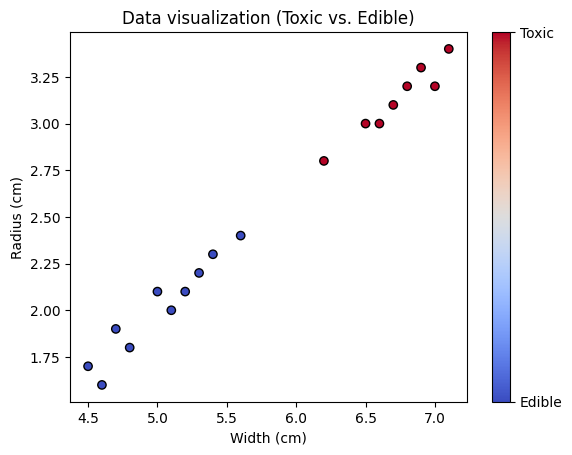

In [ ]:
# Separate features and labels
X = data[:, :2]  # Width and Radius as features
y = data[:, 2]   # Toxicity as labels

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k')

# Add colorbar to indicate toxic (1) and edible (0)
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])  # Set ticks to represent edible (0) and toxic (1)
cbar.set_ticklabels(["Edible", "Toxic"])  # Label the colorbar ticks

plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Data visualization (Toxic vs. Edible)")
plt.show()


### A construction of a machine learning algoritm by hand

We observe that the leaves are located close to the line:

$$
\frac{\textrm{Radius}}{\textrm{Width}} = \textrm{constant}.
$$

Additionally, the magnitudes of the vector $(\textrm{width}, \textrm{radius})$ are small for non-toxic plants and large for toxic ones.

One way to classify the plants could be as follows:
- First, draw the line of constant ratio $\textrm{radius}/\textrm{width}$.
- Then, draw the perpendicular to this line such that it separates the toxic and non-toxic leaves.

Now, let’s dive into finding the line of constant ratio. What we want is a line that best fits the data points. To find this line, we perform **regression**.

*How do we perform the regression?*

A mathematical formulation of the problem is to find $\beta_0$ and $\beta_1 \neq 0$ that minimize the given loss function.

The goal of linear regression is to find the coefficients $ \beta_0 $ (intercept) and $ \beta_1$ (slope) that minimize the sum of squared errors (or residuals). The cost function is given by:

$$
J(\beta_0, \beta_1) = \frac{1}{2} \sum_{i=1}^{n} \left( y_i - \left( \beta_0 + \beta_1 x_i \right) \right)^2
$$

where:
- $ y_i $ is the radius of the $ i $-th leaf,
- $ x_i $ is the width of the $ i $-th leaf,
- $ \beta_0 $ is the intercept,
- $ \beta_1 $ is the slope.

*Remark: You might wonder why we chose the sum of squared errors instead of absolute values. The reason is that the squared error gives us a convex and differentiable function, which is easier to minimize. The coefficient $\frac{1}{2}$ has no effect on the values of $ \beta_0 $ and $ \beta_1$, it is simply used to simplify the computation.*

We begin by expanding the cost function:

$$
J(\beta_0, \beta_1) = \frac{1}{2} \sum_{i=1}^{n} \left( y_i - \beta_0 - \beta_1 x_i \right)^2
$$

To minimize this function with respect to $ \beta_0 $ and $ \beta_1 $, we take the partial derivatives of $ J(\beta_0, \beta_1) $ with respect to both coefficients and set them equal to zero.

1. First, take the derivative with respect to $ \beta_0 $:

$$
\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_0} = -\sum_{i=1}^{n} \left( y_i - \beta_0 - \beta_1 x_i \right)
$$

Set this equal to zero to minimize the function:

$$
\sum_{i=1}^{n} \left( y_i - \beta_0 - \beta_1 x_i \right) = 0
$$

Expanding this:

$$
\sum_{i=1}^{n} y_i - n \beta_0 - \beta_1 \sum_{i=1}^{n} x_i = 0
$$

Solving for $ \beta_0 $:

$$
n \beta_0 = \sum_{i=1}^{n} y_i - \beta_1 \sum_{i=1}^{n} x_i
$$

$$
\beta_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \beta_1 \frac{1}{n} \sum_{i=1}^{n} x_i
$$

This gives a relationship for $ \beta_0 $ in terms of $ \beta_1 $, the mean of $ x $, and the mean of $ y $.

2. Now, take the derivative with respect to $ \beta_1 $:

$$
\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_1} = - \sum_{i=1}^{n} x_i \left( y_i - \beta_0 - \beta_1 x_i \right)
$$

Set this derivative equal to zero:

$$
\sum_{i=1}^{n} x_i \left( y_i - \beta_0 - \beta_1 x_i \right) = 0
$$

Expanding:

$$
\sum_{i=1}^{n} x_i y_i - \beta_0 \sum_{i=1}^{n} x_i - \beta_1 \sum_{i=1}^{n} x_i^2 = 0
$$

Solving for $ \beta_1 $:

$$
\beta_1 = \frac{\sum_{i=1}^{n} x_i y_i - \frac{1}{n} \sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} x_i^2 - \frac{1}{n} \left( \sum_{i=1}^{n} x_i \right)^2}
$$

This gives the expression for the slope $ \beta_1 $.

**Conclusion** The coefficients $\beta_0$ and $\beta_1$ are given by the following formulas:

$$
\beta_1 = \frac{\sum_{i=1}^{n} x_i y_i - \frac{1}{n} \sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} x_i^2 - \frac{1}{n} \left( \sum_{i=1}^{n} x_i \right)^2}
$$

$$
\beta_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \beta_1 \frac{1}{n} \sum_{i=1}^{n} x_i
$$

These formulas provide the least squares estimates for the coefficients of a simple linear regression model. We plot this regression line in the code below:


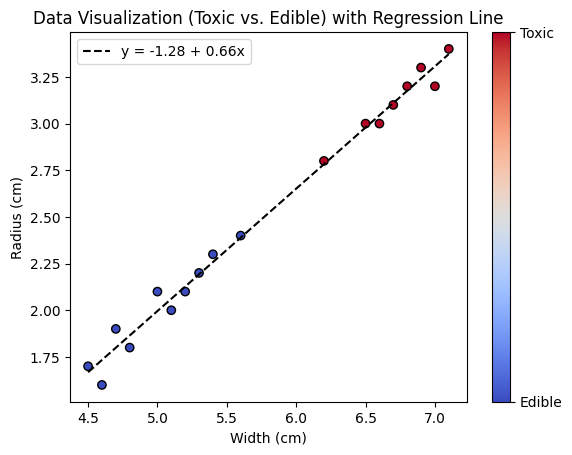

In [ ]:
# Use Width (X[:, 0]) as the independent variable to compute β_0 and β_1
x_vals = X[:, 0]
y_vals = X[:, 1]

# Calculate beta_1
n = len(x_vals)
beta_1 = (np.sum(x_vals * y_vals) - np.mean(x_vals) * np.sum(y_vals)) / (np.sum(x_vals**2) - np.mean(x_vals) * np.sum(x_vals))

# Calculate beta_0
beta_0 = np.mean(y_vals) - beta_1 * np.mean(x_vals)

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k')

# Add colorbar to indicate toxic (1) and edible (0)
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])  # Set ticks to represent edible (0) and toxic (1)
cbar.set_ticklabels(["Edible", "Toxic"])  # Label the colorbar ticks

# Plot the regression line based on y = beta_0 + beta_1 * x
x_line = np.linspace(np.min(x_vals), np.max(x_vals), 100)
y_line = beta_0 + beta_1 * x_line
plt.plot(x_line, y_line, color="black", linestyle="--", label=f"y = {beta_0:.2f} + {beta_1:.2f}x")

# Add labels and title
plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Data Visualization (Toxic vs. Edible) with Regression Line")
plt.legend()
plt.show()


The Python library scikit-learn (sklearn) provides the LinearRegression function, which allows you to find the best-fit line without the need to manually derive the formulas.

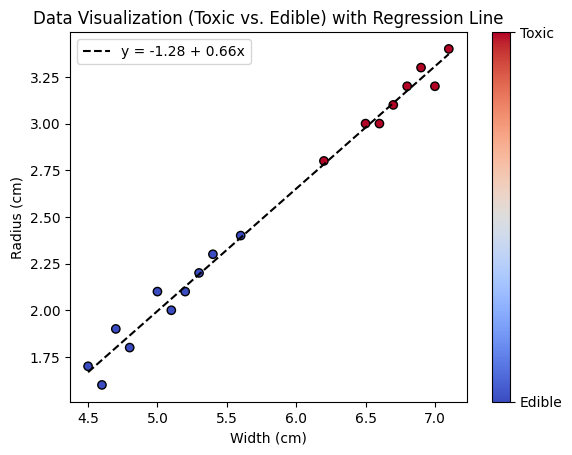

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_vals.reshape(-1, 1), y_vals)

# Extract the coefficients
beta_0 = model.intercept_  # This is the y-intercept
beta_1 = model.coef_[0]    # This is the slope

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k')

# Add colorbar to indicate toxic (1) and edible (0)
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])  # Set ticks to represent edible (0) and toxic (1)
cbar.set_ticklabels(["Edible", "Toxic"])  # Label the colorbar ticks

# Plot the regression line based on y = beta_0 + beta_1 * x
x_line = np.linspace(np.min(x_vals), np.max(x_vals), 100)
y_line = beta_0 + beta_1 * x_line
plt.plot(x_line, y_line, color="black", linestyle="--", label=f"y = {beta_0:.2f} + {beta_1:.2f}x")

# Add labels and title
plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Data Visualization (Toxic vs. Edible) with Regression Line")
plt.legend()
plt.show()

Now, we will draw a perpendicular line that effectively separates the toxic and non-toxic plants.

This perpendicular line will have the form:

$$ y = - \frac{1}{\beta_1} x + \alpha, $$

where $ \alpha \in \mathbb{R} $. The value of $ \alpha $ determines the position of the perpendicular. We can choose $ \alpha $ such that this perpendicular intersects the regression line at the midpoint between the widths of the closest toxic and non-toxic leaves.

To proceed, we first compute the midpoint, defined as:

$$ \text{midwidth} = \frac{\text{nontoxic_max_width} + \text{toxic_min_width}}{2}. $$

This enables us to solve for $ \alpha $ by setting up the following equation:

$$ \alpha = \beta_0 + \beta_1 \textrm{midwith} + \frac{1}{\beta_1} \textrm{midwith}. $$

The code below provides a plot of this perpendicular line.


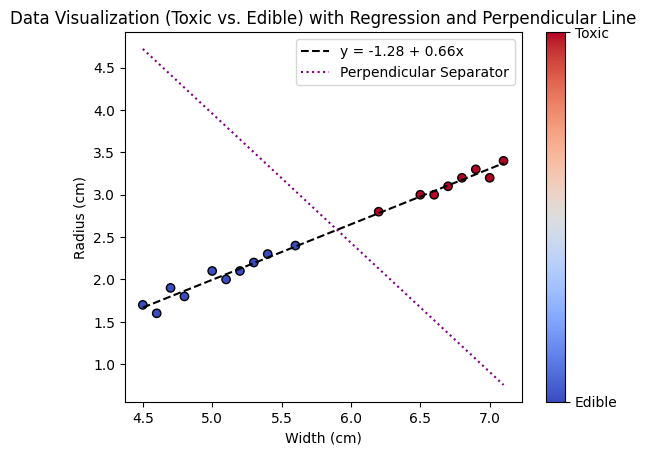

In [ ]:
# Compute midpoint (med) for the closest toxic and non-toxic leaves
nontoxic_max_width = np.max(x_vals[y == 0])  # Max width among edible plants
toxic_min_width = np.min(x_vals[y == 1])     # Min width among toxic plants
midpoint = (nontoxic_max_width + toxic_min_width) / 2  # Midpoint in width

# Determine the y-value of the regression line at the midpoint
y_mid = beta_0 + beta_1 * midpoint

# Calculate the perpendicular line’s slope and intercept
perpendicular_slope = -1 / beta_1
perpendicular_intercept = y_mid - perpendicular_slope * midpoint

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k')

# Add colorbar to indicate toxic (1) and edible (0)
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])  # Set ticks to represent edible (0) and toxic (1)
cbar.set_ticklabels(["Edible", "Toxic"])  # Label the colorbar ticks

# Plot the regression line based on y = beta_0 + beta_1 * x
x_line = np.linspace(np.min(x_vals), np.max(x_vals), 100)
y_line = beta_0 + beta_1 * x_line
plt.plot(x_line, y_line, color="black", linestyle="--", label=f"y = {beta_0:.2f} + {beta_1:.2f}x")

# Plot the perpendicular line
y_perpendicular = perpendicular_slope * x_line + perpendicular_intercept
plt.plot(x_line, y_perpendicular, color="purple", linestyle=":", label="Perpendicular Separator")

# Add labels and title
plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Data Visualization (Toxic vs. Edible) with Regression and Perpendicular Line")
plt.legend()
plt.show()

Step by step, we have separated the plants based on their toxicity. The perpendicular separator we defined is called the decision boundary.
For a new plant, it will be classified as toxic if it falls on the toxic side (to the right of the decision boundary) and non-toxic if it falls on the other side.

In the machine learning algorithm we developed manually, our approach closely resembled that of the **support vector classifier (SVC)**.

### Support vector classifier



The SVC is a powerful machine learning algorithm used for binary classification. It aims to find the optimal hyperplane that best separates the data points of two different classes. In the linear case, where the data is linearly separable, the SVC algorithm looks for the hyperplane that maximizes the margin between the two classes.


**Key Concepts:**

1. **Hyperplane:**
   - A hyperplane is a decision boundary that separates data points of different classes.
   - In a 2D space, a hyperplane is a line, while in 3D it is a plane, and in higher dimensions, it is a general hyperplane.
   - The goal of SVC is to find the hyperplane that best separates the two classes in the feature space.

2. **Margin:**
   - The margin is the distance between the hyperplane and the closest points from each class.
   - The SVC algorithm aims to maximize this margin, which is the distance between the hyperplane and the support vectors (the closest data points to the hyperplane).
   - A larger margin usually results in better generalization and classification performance.

3. **Support Vectors:**
   - Support vectors are the data points that lie closest to the decision boundary (hyperplane).
   - These points are critical for determining the position of the hyperplane, and removing them would change the decision boundary.



   In the case of linearly separable data (where two classes can be separated by a straight line or hyperplane), the SVC algorithm tries to find the hyperplane that **maximizes the margin** between the two classes.

   - The equation of the hyperplane is represented as:

     $$
     w \cdot x + b = 0
     $$

     where:
     - $w$ is the weight vector, which is perpendicular to the hyperplane.
     - $x$ is the feature vector.
     - $b$ is the bias term that helps shift the hyperplane.
   
   The objective of the SVC is to find the values of $w$ and $b$ such that the margin between the classes is as wide as possible while ensuring that all points are correctly classified.

   - The margin can be calculated as the distance between the hyperplane and the closest data points. To maximize this margin, we minimize the following objective function:

     $$
     \frac{1}{2} \|w\|^2
     $$

     subject to the constraints that all data points are correctly classified, which can be written as:

     $$
     y_i (w \cdot x_i + b) \geq 1, \quad \forall i
     $$

     Here:
     - $y_i$ is the class label of the $i$-th data point (either +1 or -1),
     - $x_i$ is the feature vector of the $i$-th data point.

     These constraints ensure that each data point is correctly classified on the correct side of the hyperplane.

**Solving the Optimization Problem:**

   To find the optimal hyperplane, we need to solve this constrained optimization problem. This involves finding the values of $w$ and $b$ that maximize the margin while satisfying the classification constraints.

   - The optimization problem can be solved using **Quadratic Programming** or other optimization techniques.

**Final Decision Rule:**

   Once the optimal hyperplane is found, the classifier can predict the class of new data points. A new data point $x$ is classified as follows:

   - If $w \cdot x + b > 0$, then the point is classified as belonging to class +1.
   - If $w \cdot x + b < 0$, then the point is classified as belonging to class -1.

   The decision rule is based on which side of the hyperplane the new point lies on.

The following code performs an SVC on the plant dataset.

Training Accuracy: 1.0


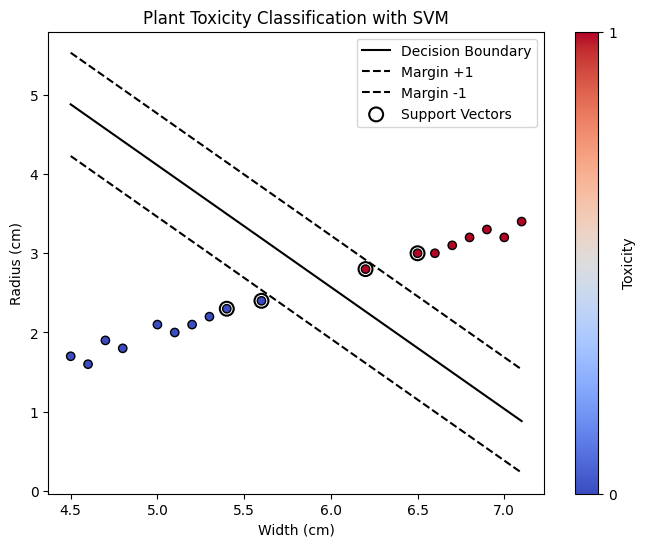

In [ ]:
# Separate features and labels
X = data[:, :2]  # Width and Radius
y = data[:, 2]   # Toxicity label

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel for linear classification
svm_model.fit(X, y)

# Calculate accuracy on training data
predictions = svm_model.predict(X)
accuracy = accuracy_score(y, predictions)
print("Training Accuracy:", accuracy)

# Plot the decision boundary and the margin
plt.figure(figsize=(8, 6))

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.colorbar(scatter, ticks=[0, 1], label="Toxicity")
plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Plant Toxicity Classification with SVM")

# Get the separating hyperplane
w = svm_model.coef_[0]  # Coefficients of the decision boundary
b = svm_model.intercept_[0]  # Intercept

# Calculate the slope and intercept for the line in (Width, Radius) space
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plot the decision boundary (hyperplane)
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
decision_boundary = slope * x_vals + intercept
plt.plot(x_vals, decision_boundary, 'k-', label="Decision Boundary")

# Calculate the margin lines (distance from hyperplane)
margin = 1 / np.sqrt(np.sum(w**2))
plt.plot(x_vals, decision_boundary + margin, 'k--', label="Margin +1")
plt.plot(x_vals, decision_boundary - margin, 'k--', label="Margin -1")

# Show support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

plt.legend()
plt.show()


The decision boundary we obtained is slightly different from the one generated by our custom algorithm. This algorithm is known as Support Vector Machine (SVM), as the decision boundary is determined by only a few key data points, called support vectors. These support vectors are highlighted with circles in the figure above.

We have in the previous part derived

### Logistic Regression

A more machine learning (ML)-oriented approach involves structuring the problem as a well-defined task. This allows us to focus on setting clear objectives, while delegating the computational complexity and problem-solving effort to the algorithm.

In this example, the task is to classify plants based on their leaf dimensions. Specifically, our goal is to predict whether a new plant is toxic or not, using the measurements of its leaves. In simpler terms, we aim to build a model that can accurately assign plants to their correct category—toxic or non-toxic—with as few errors as possible.

The central question then becomes: *How can we translate this classification task into a mathematical framework?* A good starting point is to examine the dataset and formulate a hypothesis about the relationship between the leaf dimensions and the plant's toxicity. By making such an assumption, we can leverage mathematical tools and techniques to derive a model capable of making these predictions.


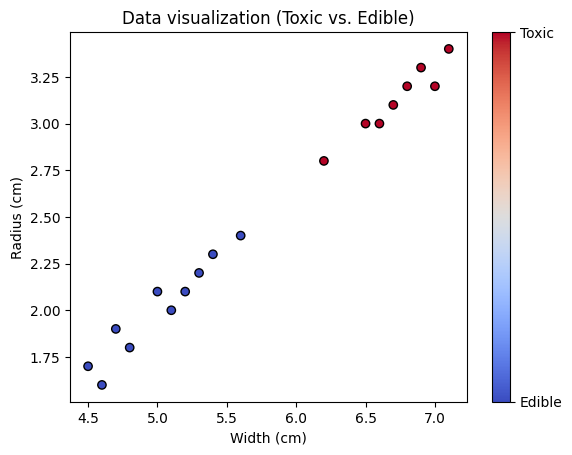

In [ ]:
# Separate features and labels
X = data[:, :2]  # Width and Radius as features
y = data[:, 2]   # Toxicity as labels

# Plot the data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k')

# Add colorbar to indicate toxic (1) and edible (0)
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])  # Set ticks to represent edible (0) and toxic (1)
cbar.set_ticklabels(["Edible", "Toxic"])  # Label the colorbar ticks

plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Data visualization (Toxic vs. Edible)")
plt.show()

Because of the data distribution, a reasonable and effective hypothesis would be the following:

*We assume that the toxic and non-toxic plants can be classified into two distinct categories, separated by a straight line.*

Why is this hypothesis smart?

1. It is realistic:  
   By observing the data, we can see that the toxic and non-toxic plants form two clearly distinguishable groups. Importantly, there are no overlapping or intertwined data points from the two classes in the figure above. This visual cue supports the idea that a simple separation might suffice.

2. It proposes linear separability:  
   This hypothesis assumes that a straight line can separate the two categories, an approach commonly referred to in machine learning and data science as the *linearly separable hypothesis*. This is a smart assumption for two reasons:
   
   - **Plausibility**: The hypothesis aligns with the observed data distribution, making it likely to hold true.  
   - **Simplicity**: A linear boundary represents one of the simplest models available. While it is possible to imagine more complex boundaries—such as polynomial or non-linear curves—a simpler model is generally preferable when it suffices. Simpler models are easier to train, interpret, and generalize well to unseen data, making linear separability an ideal starting point.

By starting with this hypothesis, we embrace the principle of parsimony (*Occam's Razor*), which suggests opting for the simplest explanation or model that adequately explains the data.


**Mathematical Formulation of the Problem**

Based on the hypothesis of linear separability, we aim to find a straight line that separates toxic plants from non-toxic ones. Mathematically, the equation of the decision boundary can be written as:

$$ w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0 $$

Here:
- $x_1$ and $x_2$ represent the width and radius of a plant's leaf, respectively.
- $w_1$ and $w_2$ are the weights (coefficients) that determine the orientation of the decision boundary.
- $b$ is the bias term, which shifts the decision boundary.

**Classification Rule**

Given this decision boundary, a new plant can be classified as follows:
- If $w_1 \cdot x_1 + w_2 \cdot x_2 + b > 0$, the plant is classified as **toxic** ($y = 1$).
- If $w_1 \cdot x_1 + w_2 \cdot x_2 + b \leq 0$, the plant is classified as **non-toxic** ($y = 0$).

To achieve perfect classification, we require that the model correctly assigns each plant in the dataset to its respective category. This can be expressed mathematically using the **0/1 loss function**, which measures whether a prediction is correct ($0$ loss) or incorrect ($1$ loss). For a dataset with $n$ samples, the total loss is:

$$ L = \sum_{i=1}^n \mathbb{1}_{\{ y_i \neq \hat{y}_i \}} $$

Here:
- $y_i$ is the true label (toxic or non-toxic) for the $i$-th plant.
- $\hat{y}_i$ is the predicted label for the $i$-th plant.
- $\mathbb{1}_{\{\cdot\}}$ is the indicator function, which equals $1$ if the condition inside is true, and $0$ otherwise.

For zero classification error, we require that:

$$ \mathbb{1}_{\{ y_i \neq \hat{y}_i \}} = 0 \quad \text{for all } i = 1, 2, \dots, n. $$

This means every prediction must match the true label. Translating this into constraints for the decision boundary, we have:

- For toxic plants ($y_i = 1$), we need $w_1 \cdot x_{1i} + w_2 \cdot x_{2i} + b > 0$.
- For non-toxic plants ($y_i = 0$), we need $w_1 \cdot x_{1i} + w_2 \cdot x_{2i} + b \leq 0$.

The **key challenge** is to find the optimal values of $w_1$, $w_2$, and $b$ that satisfy these constraints for all data points. This ensures that the decision boundary perfectly separates the two classes with zero classification error.


To solve this challenge, we need to define the loss function more precisely. The loss is a function of $w = (w_1, w_2)$, $b$, and the dataset. However, since the dataset is fixed, we omit its explicit dependence. Additionally, the event $ \mathbb{1}_{\{ y_i \neq \hat{y}_i \}} = 0$ can be rewritten using the boundary expression.

To achieve this, we note that the classification condition $y_i \neq \hat{y}_i$ depends on the sign of $w \cdot x_i + b$ (the linear score) relative to $y_i$. By rewriting $y_i$ as $2y_i - 1$ (mapping $y_i = 0$ to $-1$ and $y_i = 1$ to $1$), the condition becomes:

$$ (2y_i - 1)(w \cdot x_i + b) > 0. $$

This expression ensures that the prediction aligns with the true label:
- If $y_i = 1$ (toxic), $2y_i - 1 = 1$, so the condition is $w \cdot x_i + b > 0$, matching the boundary condition.
- If $y_i = 0$ (non-toxic), $2y_i - 1 = -1$, so the condition is $w \cdot x_i + b \leq 0$, again matching the boundary condition.

To normalize the loss across datasets of different sizes, we divide by $n$, the number of plants. Thus, the loss function becomes:
$$ L(w, b) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}_{\{(2y_i - 1)(w \cdot x_i + b) > 0\}} $$

*Observations:*
1. *Equivalence of Formulations*  
   The condition $(2y_i - 1)(w \cdot x_i + b) > 0$ is equivalent to the true classification $y_i = \hat{y}_i$. When this product is positive, it indicates that the prediction matches the true label, resulting in zero loss for that particular sample. Conversely, if the product is negative, the prediction does not match the true label, which contributes to the loss.

2. *Normalization by Sample Size*  
   Dividing by $n$ (the total number of samples) helps standardize the loss value across datasets of different sizes. Without normalization, datasets with more samples would inherently have larger loss values, even if the model’s classification performance remained consistent.

3. *Discrete Nature of the Loss*  
   Due to the indicator function $\mathbb{1}$, this loss is non-differentiable, making it challenging to optimize directly. Minimizing the 0/1 loss exactly is typically impractical, and so alternative approaches—such as using differentiable approximations—are common in machine learning. This limitation is what motivates the use of functions like the **hinge loss** or **logistic loss**. These alternatives approximate the 0/1 behavior while enabling efficient optimization.

To address the non-differentiability of the indicator-based loss, we replace the hard decision boundary with a **smooth, probabilistic interpretation** of classification using the sigmoid function:

$$ \sigma(x) = \frac{1}{1 + e^{-x}}. $$



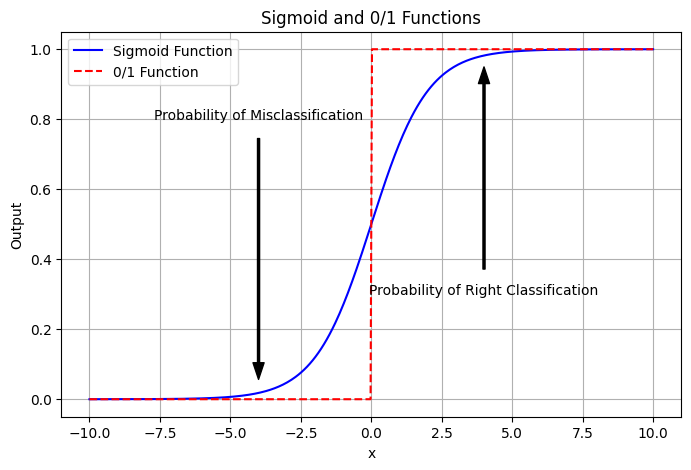

In [ ]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the 0/1 function
def zero_one(x):
    return np.where(x > 0, 1, 0)

# Generate x values
x_values = np.linspace(-10, 10, 400)

# Compute y values for both functions
sigmoid_values = sigmoid(x_values)
zero_one_values = zero_one(x_values)

# Plot the functions
plt.figure(figsize=(8, 5))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.plot(x_values, zero_one_values, label='0/1 Function', color='red', linestyle='--')

# Add an upward-pointing arrow for "Probability of Right Classification"
plt.annotate(
    "Probability of Right Classification",
    xy=(4, sigmoid(4)),  # Arrow points at this coordinate
    xytext=(4, 0.3),     # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
    ha='center'
)

# Add a downward-pointing arrow for "Probability of Misclassification"
plt.annotate(
    "Probability of Misclassification",
    xy=(-4, sigmoid(-4)),  # Arrow points at this coordinate
    xytext=(-4, 0.8),      # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
    ha='center'
)

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Output")
plt.title("Sigmoid and 0/1 Functions")
plt.legend()



# Show the plot
plt.grid()
plt.show()


The sigmoid function maps any real-valued input to the interval $[0, 1]$, which is useful for interpreting the output as a probability. By applying the sigmoid function to the linear expression $(2y_i - 1)(w \cdot x_i + b)$, we can smoothly approximate the classification probability of each sample.
In the context of our plant classification task, where each plant is represented by its leaf size $(x_i, y_i)$, the expression

$$ \sigma((2y_i - 1)(w \cdot x_i + b)) $$

gives the probability that the plant is well classified. Here, $(2y_i - 1)(w \cdot x_i + b)$ is a measure of how far the sample is from the decision boundary:

- If this value is close to zero, it suggests that the plant is near the decision boundary, and thus the model has low confidence in classifying it as toxic or non-toxic.
- If the value is positive and large, it means that the sample is far from the boundary and the model is very confident that the plant is well classified.
- Conversely, if it is large and negative, it suggests with high confidence that the plant is misclassified.

Given this probabilistic interpretation, we can define an overall quantity that measures how well our model classifies all samples:

$$ \mathbb{P}(w,b) = \prod_{i = 1}^n \sigma((2y_i - 1)(w \cdot x_i + b)) $$

This product represents the probability that all plants are classified correctly according to our model. Known as the **likelihood**, this quantity serves as a natural criterion for determining the best decision boundary $(w, b)$. To maximize this probability, we seek the decision boundary that yields the highest likelihood, a process known in statistics as **maximum likelihood estimation (MLE)**. Here, we estimate the parameters of our model by maximizing the likelihood function.

*Remark: The idea behind maximizing the likelihood is intuitive. In data science, our objective—illustrated here by the plant classification task—is to extract insights from data. Specifically, we aim to explain what determines toxicity in plants based on observable features. One way to tackle this is by hypothesizing a model, then adjusting it to make it as realistic as possible. But "realistic" needs clarification, and a practical interpretation is to "maximize the probability of observing the data we have."*

To achieve this, we often turn to optimization techniques by minimizing the negative logarithm of this probability. The expression becomes:

$$
\begin{aligned}
 \mathcal{L}(w,b) &= - \sum_{i = 1}^n \log(\sigma((2y_i - 1)(w \cdot x_i + b))) \\[5pt]
 &= \sum_{i = 1}^n \log \left(1 - e^{-(2y_i - 1)(w \cdot x_i + b)} \right).
 \end{aligned}
$$

This expression, known as the **logistic loss**, is differentiable and allows us to use gradient-based optimization methods to find the optimal values of $w$ and $b$.

By minimizing the logistic loss, we adjust the model parameters so that toxic plants lie well into the positive region and non-toxic plants lie well into the negative region, thus maximizing the probability of correct classification and achieving effective separation between the classes.

Since the logistic loss is differentiable, we can proceed by performing a **gradient descent** to find the minimum. The gradient is given by:

$$
∇ \mathcal{L}(w,b) = \begin{pmatrix}
\frac{\partial \mathcal{L}(w, b)}{\partial w}  \\
\frac{\partial \mathcal{L}(w, b)}{\partial b}
\end{pmatrix}.
$$

These derivatives provide the direction of steepest descent for the logistic loss, guiding the optimization process towards the values of $w$ and $b$ that minimize the loss and yield the best separation between toxic and non-toxic plants.

In the code below, we implement logistic regression using the LogisticRegression function from the scikit-learn library. As being said, logistic regression is a powerful classification algorithm commonly used for binary classification tasks, where the goal is to predict one of two possible outcomes. By fitting a linear decision boundary to the training data, the model predicts the probability of an instance belonging to one of the classes. Scikit-learn’s LogisticRegression class automatically applies optimization techniques to find the best-fitting model parameters (weights and bias), which maximize the likelihood of correct predictions. The model output is interpreted as a probability, thanks to the sigmoid function, and we can use it to classify new data points.

This implementation provides a straightforward and efficient way to train a logistic regression model, evaluate its accuracy, and visualize the decision boundary for classification tasks.


Accuracy: 1.0


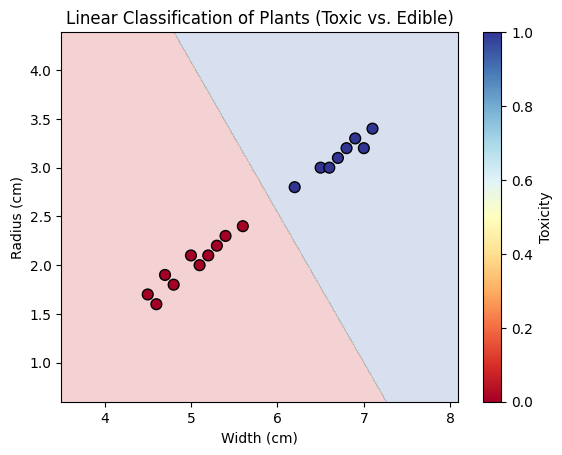

In [ ]:
# Separate features and labels
X = data[:, :2]  # Width and Radius as features
y = data[:, 2]   # Toxicity as labels

# Initialize and train the linear classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X, y)

# Predict the labels using the trained model
predictions = classifier.predict(X)
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

# Plotting the decision boundary
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=60)
plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Linear Classification of Plants (Toxic vs. Edible)")
plt.colorbar(label='Toxicity')
plt.show()



There is four steps in the alogorithm:
 1. The first step is to create an instance of the logistic regression model. This is done using the `LogisticRegression()` function from scikit-learn. ```model = LogisticRegression()```
 2. The next step is to train the model using the training data. We use the ``fit()`` method, which takes the **feature data** ($X =(\textrm{width},\textrm{radius})$) and the **target labels** ($y \in \{0,1\}$) to adjust the model’s parameters (weights and bias). ``model.fit(X,y)``
 3. After training the model, we evaluate its performance by visualizing the decision boundary. In 2D, this boundary is a line, and in higher dimensions, it is a hyperplane that separates the two classes. By plotting the decision boundary, we can visually inspect how well the model classifies the data and identify areas where it may struggle (i.e., near the boundary). This helps us assess the model's generalization ability and robustness. We can also computate the **accuracy**,
 $$ \textrm{accuracy} = \frac{\textrm{well classified data}}{\textrm{well} + \textrm{misclassified data}}.$$

*Remark: It is important to be cautious when using any* **metric score**, *such as accuracy, to evaluate model performance. In cases of imbalanced datasets, accuracy can provide a misleading assessment of the model's effectiveness. For example, if there are significantly more toxic plants than non-toxic ones in the dataset, a model that predicts "toxic" for most plants may appear to perform well in terms of accuracy, even though it fails to correctly classify non-toxic plants.*


Now that our logistic regression model is trained, we can use it to make predictions for new plants. Given the features of a new plant (e.g., leaf size, width, and radius), we input these values into the trained model to obtain the predicted class. The model will output a probability indicating how likely the plant is to belong to the toxic or non-toxic category. Based on this probability, we can assign the plant to the most likely class.

For example, we can use the following code to predict the class of a new plant:

Test Set Accuracy: 1.0
Test Predictions: [0. 1. 0. 1. 0. 1. 0. 1.]
Actual Test Labels: [0. 1. 0. 1. 0. 1. 0. 1.]


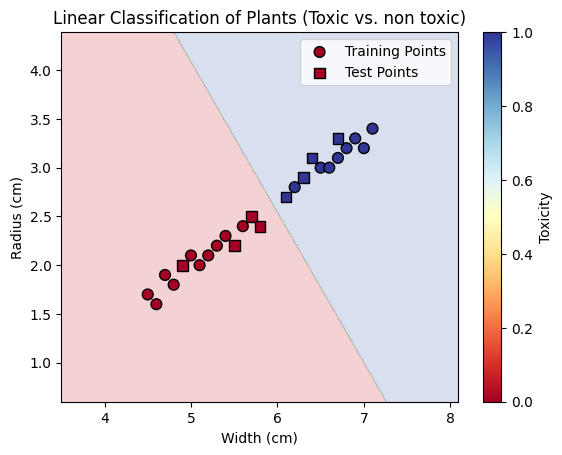

In [ ]:
# Test Dataset: New data to evaluate the classifier
test_data = np.array([
    [5.7, 2.5, 0],
    [6.3, 2.9, 1],
    [4.9, 2.0, 0],
    [6.4, 3.1, 1],
    [5.5, 2.2, 0],
    [6.7, 3.3, 1],
    [5.8, 2.4, 0],
    [6.1, 2.7, 1]
])

# Separate test features and labels
X_test = test_data[:, :2]
y_test = test_data[:, 2]

# Initialize and train the linear classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X, y)

# Predict on the test set
test_predictions = classifier.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy)

# Print predictions for the test set
print("Test Predictions:", test_predictions)
print("Actual Test Labels:", y_test)

# Plotting the decision boundary with both training and test points
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=60, marker='o', label="Training Points")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu, s=60, marker='s', label="Test Points")
plt.xlabel("Width (cm)")
plt.ylabel("Radius (cm)")
plt.title("Linear Classification of Plants (Toxic vs. non toxic)")
plt.colorbar(label='Toxicity')
plt.legend()
plt.show()


After training our logistic regression model on the training dataset, we evaluate its performance using a **test dataset**. This evaluation is crucial as it helps us understand how well the model generalizes to new, unseen data—something that is essential for ensuring its real-world applicability. Below is an overview of the key results:

- **Test Set Performance**: The model achieved **perfect accuracy** on the test set, correctly classifying all test samples as toxic or non-toxic. This suggests that the model has effectively learned the relationship between the input features (leaf size) and the target labels (toxicity) during training and can accurately predict toxicity in new, unseen samples.

- **Decision Boundary and Class Separation**: By visualizing the decision boundary, we can see that the model has created a clear division between the toxic and non-toxic plants, with the test data points also lying on the correct side of the boundary. This visual inspection confirms that the model's decision-making is consistent with the underlying structure of the data.

- **Model Generalization**: The fact that the model performs well on both the training data and the test data suggests that it has generalized well. This is a key aspect of a robust model—ensuring that it does not overfit to the training data, but instead learns patterns that are applicable to any new data it encounters.

**Broader Takeaways**

The success of logistic regression in this task highlights the power of such ML algorithm called here **supervised learning algorithms** in classification tasks, especially when the data is well-structured and the model is appropriately regularized. Furthermore, the ability to visualize the **decision boundary** provides valuable insights into the model's behavior, offering a clear explanation of how it classifies new examples.

In real-world applications, this approach is essential because models that cannot generalize well to unseen data can lead to poor performance when deployed in dynamic environments. The high accuracy and well-separated decision boundary in our case suggest that this logistic regression model would be effective in real-world plant toxicity classification tasks, making it a practical tool for predictive analytics in fields like agriculture or environmental science.


### Conclusion and take home message

The classification task that we performed is known as binary linear classification. It is binary because it involves two distinct classes, and linear because the decision boundary can be represented with a simple linear equation.

This task captures the essence of machine learning, where models learn to identify patterns from data, extracting knowledge that might otherwise remain hidden. Machine learning does not just automate processes—it helps us interpret, understand, and even predict aspects of reality by leveraging the power of computation.

Yet, reality is often complex, and the relationships in data are not always clear-cut or easily separable by simple boundaries. For instance, if the plants in our dataset were not linearly separable, we would need more sophisticated techniques to uncover the underlying patterns, perhaps through nonlinear transformations or other feature engineering approaches. This is where the potential of machine learning truly unfolds.




##Edibility of plants and nonlinear classification


The team of biologists celebrated their groundbreaking achievement: they had successfully classified toxic and non-toxic plants using the shapes of their leaves through a linear classification model. This breakthrough promised safer ecosystems, as animals and humans could now distinguish between harmful and harmless plants with ease. The team's discovery was heralded as a triumph of science and machine learning.

However, an alarming phenomenon soon emerged. Entire colonies of ants were mysteriously dying after collecting what the model identified as "non-toxic" plants. Despite the model's high accuracy in the lab, these plants wreaked havoc in the ants’ colonies. Confused and concerned, the biologists embarked on a deeper investigation.

To understand the mystery, the team began mapping the geographic locations of both the thriving and decimated ant colonies. Run the code below to import the data:

In [ ]:
# Function to generate the dataset
def colonies_locations(num_points=200, circle_radius=5, center=(0, 0)):
    """
    Generate a dataset of ant colonies' locations. Colonies inside the toxic radius
    are marked as affected (1), while others outside are unaffected (0).
    """
    # Generate random points (x, y) in the 2D plane
    X = np.random.uniform(-circle_radius * 1.5, circle_radius * 1.5, (num_points, 2))

    # Calculate the Euclidean distance of each point from the center
    distances = np.linalg.norm(X - center, axis=1)

    # Label points based on whether they are inside (1) or outside (0) the toxic zone
    y = (distances > circle_radius).astype(int)

    return X, y

X, y = colonies_locations(num_points=200, circle_radius=5)


### Data Vizualization

Just as before, a good starting point is to closely examine the dataset. Observing its structure, patterns, and distribution provides valuable insights into the problem at hand and sets the foundation for any subsequent analysis or modeling.

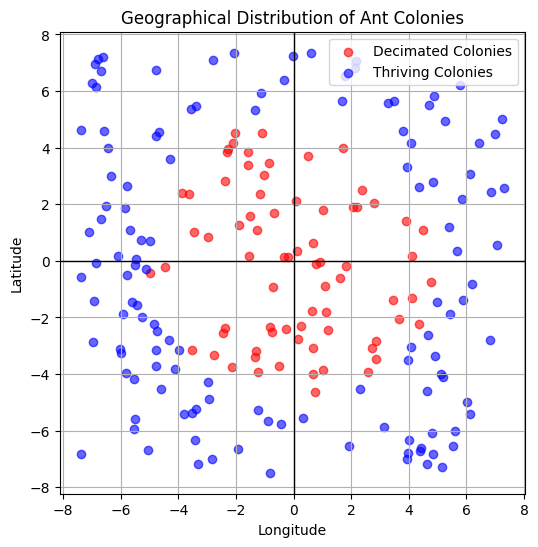

In [ ]:
# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Decimated Colonies', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Thriving Colonies', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Ant Colonies')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


To solve this problem using machine learning, we can leverage what we've learned about linear classification. However, in this case, it's clear that no simple straight line can separate the decimated colonies (red) from the thriving colonies (blue). To overcome this, we can transform the dataset in a way that makes it linearly separable while preserving its inherent structure.

### Feature engineering




One approach is to apply a **feature map**, which is a mathematical function that transforms the data into a higher-dimensional space where the separation becomes easier. Specifically, we define a feature map $\Phi$ from the original 2D space $\mathbb{R}^2$ to a transformed space $\Phi(\mathbb{R}^2)$:

$$ \Phi : \mathbb{R}^2  \to \Phi(\mathbb{R}^2) $$

The goal is to transform the dataset so that it becomes linearly separable in the new feature space.  A smart way to do this is by adding a feature that measures the Euclidean distance from the center point (the origin, in this case). This new feature can help in distinguishing between the colonies that are inside the circle (label 0) and those that are outside (label 1).

We define the feature map as:

$$ \Phi(x_1,x_2) = \left( x_1, x_2, 4(x_1^2 + x_2^2) \right) $$

This transformation introduces a new third dimension based on the squared distance from the center of the circle, which can help make the data linearly separable in the transformed space.

The following plot visualizes the location of the ants' colonies after applying the feature map, showing how the transformation helps in distinguishing the two classes more clearly.



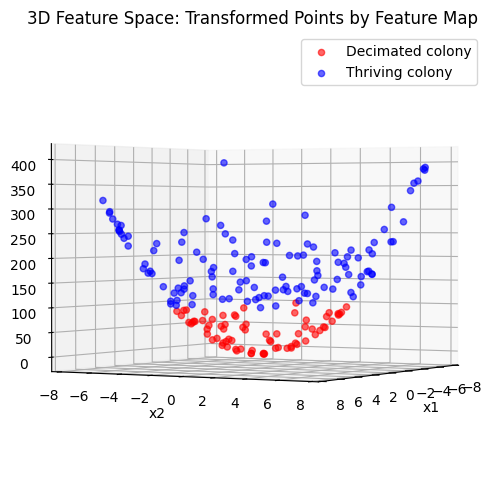

In [ ]:
# Feature map function
def feature_map(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.column_stack((x1, x2, 4*(x1**2 + x2**2)))


# Apply the feature map to the dataset
X_featured = feature_map(X)
data = np.column_stack((X_featured, y))

# Plotting in 3D space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the transformed points
ax.scatter(X_featured[y == 0, 0], X_featured[y == 0, 1], X_featured[y == 0, 2],
           color='red', label='Decimated colony', alpha=0.6)
ax.scatter(X_featured[y == 1, 0], X_featured[y == 1, 1], X_featured[y == 1, 2],
           color='blue', label='Thriving colony', alpha=0.6)

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('4*(x1^2 + x2^2)')
ax.set_title('3D Feature Space: Transformed Points by Feature Map')

# Show legend
ax.legend()

# Adjust view to make the red points clearly above the blue points
ax.view_init(elev=1, azim=30)

# Display the plot
plt.show()


### Support vector classifier in transformed space

In the transformed feature space, the data appears to be linearly separable. To leverage the techniques we've learned in this course, we can use a **Support Vector Classifier (SVC)** from the **scikit-learn** library to find the optimal decision boundary.

While it is possible to derive the decision boundary manually by maximizing the margin — the distance between the two classes — the focus of this course is not on hand-calculating these values. Instead, we aim to take advantage of simple, efficient methods provided by existing libraries, reserving complex mathematical derivations for when they are necessary.

The following code demonstrates how to use the SVC to find and plot the separating affine hyperplane that divides the two classes.


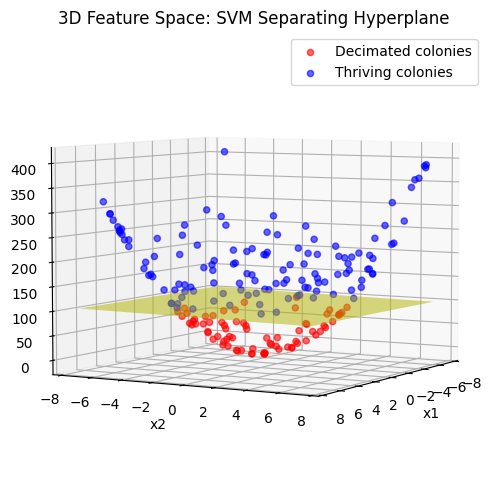

In [ ]:
# Train SVM on the transformed feature space
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_featured, y)

# Extract the separating hyperplane parameters (weights and bias)
weights = svm_classifier.coef_[0]
bias = svm_classifier.intercept_[0]

# Define the decision boundary (hyperplane) equation in the feature space
# Equation of the hyperplane: w1*x1 + w2*x2 + w3*x3 + b = 0

# Create a grid of points in 3D space for plotting
x1_range = np.linspace(X_featured[:, 0].min(), X_featured[:, 0].max(), 50)
x2_range = np.linspace(X_featured[:, 1].min(), X_featured[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Compute the corresponding x3 values based on the decision boundary
x3_grid = -(weights[0]*x1_grid + weights[1]*x2_grid + bias) / weights[2]

# Plotting the data and the separating hyperplane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_featured[y == 0, 0], X_featured[y == 0, 1], X_featured[y == 0, 2],
           color='red', label='Decimated colonies', alpha=0.6)
ax.scatter(X_featured[y == 1, 0], X_featured[y == 1, 1], X_featured[y == 1, 2],
           color='blue', label='Thriving colonies', alpha=0.6)

# Plot the separating hyperplane (decision boundary)
ax.plot_surface(x1_grid, x2_grid, x3_grid, color='yellow', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('4*(x1^2 + x2^2)')
ax.set_title('3D Feature Space: SVM Separating Hyperplane')

# Show legend
ax.legend()

# Adjust view for better visualization
ax.view_init(elev=5, azim=30)

# Display the plot
plt.show()


### Achieving a nonlinear boundary using a linear approach

To transition from the feature space back to the original geographic space of the colonies (latitude and longitude), we need to determine the boundary $B$ that separates the decimated colonies from the thriving ones in $\mathbb{R}^2$.


Let $H$ denote the affine separating hyperplane in the feature space. The corresponding boundary $B$ in $\mathbb{R}^2$ is defined as:

$$
B = \Phi^{-1} \left( H \cap \Phi \left( \mathbb{R}^2 \right) \right).
$$
Why does this definition work? The reasoning is as follows:
1. A point $(x_1, x_2)$ lies on the boundary $B$ if and only if its feature-transformed image $\Phi(x_1, x_2)$ lies on the hyperplane $H$:
   $$
   (x_1, x_2) \in B \iff \Phi(x_1, x_2) \in H.
   $$
2. Additionally, since $\Phi(x_1, x_2)$ is in the range of $\Phi$, we also have:
   $$
   \Phi(x_1, x_2) \in H \cap \Phi\left(\mathbb{R}^2\right).
   $$
3. Applying $\Phi^{-1} : \Phi \left( \mathbb{R}^2 \right) \to \mathbb{R}^2$, which is bijective, we arrive at:
   $$
   (x_1, x_2) \in \Phi^{-1} \left( H \cap \Phi\left(\mathbb{R}^2\right) \right).
   $$

Thus, the boundary $B$ is precisely the inverse image of the intersection of $H$ with $\Phi(\mathbb{R}^2)$.

We now derive the boundary

The feature map is defined as:
$$
\Phi(x_1, x_2) = \left(x_1, x_2, 4(x_1^2 + x_2^2)\right).
$$

The range of $\Phi$ is:
$$
\Phi\left(\mathbb{R}^2\right) = \left\lbrace \left(x_1, x_2, 4(x_1^2 + x_2^2)\right) \mid (x_1, x_2) \in \mathbb{R}^2 \right\rbrace.
$$

The separating hyperplane $H$ in the feature space is given by the equation derived from the SVM classifier:
$$
H: \left\lbrace (y_1, y_2, y_3) \in \mathbb{R}^3 \mid w_1 y_1 + w_2 y_2 + w_3 y_3 + b = 0 \right\rbrace.
$$

The intersection $H \cap \Phi\left(\mathbb{R}^2\right)$ is therefore:
$$
H \cap \Phi\left(\mathbb{R}^2\right) = \left\lbrace \left(x_1, x_2, 4(x_1^2 + x_2^2)\right) \mid (x_1, x_2) \in \mathbb{R}^2 \text{ and } w_1 x_1 + w_2 x_2 + 4w_3(x_1^2 + x_2^2) + b = 0 \right\rbrace.
$$

Applying $\Phi^{-1}$, we obtain the boundary in $\mathbb{R}^2$:
$$
B = \left\lbrace (x_1, x_2) \in \mathbb{R}^2 \mid 4w_3 x_1^2 + 4w_3 x_2^2 + w_1 x_1 + w_2 x_2 + b = 0 \right\rbrace.
$$


The resulting equation for $B$ is a **conic section** (e.g., a circle, ellipse, parabola, or hyperbola) depending on the parameters $w_1, w_2, w_3,$ and $b$. This reflects the flexibility of using nonlinear feature transformations, as they allow us to solve problems that are not linearly separable in the original space.

In this case, the SVM in the feature space finds a linear separator, but when projected back to the original space, the separator becomes a curved boundary, effectively distinguishing the decimated colonies from the thriving ones.


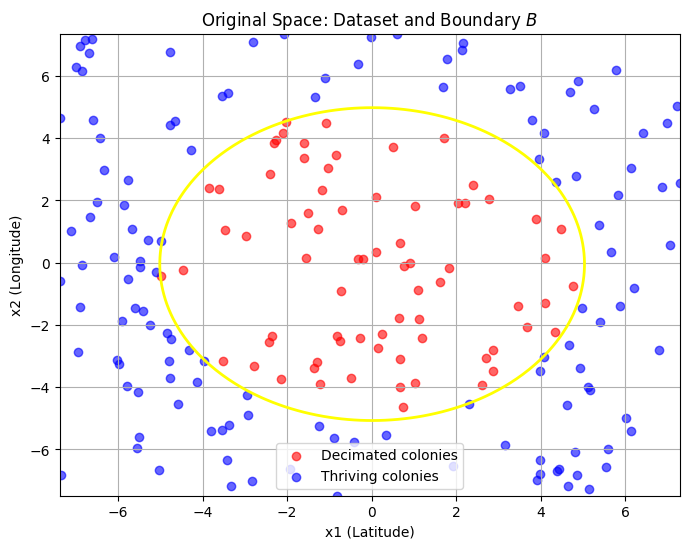

In [ ]:
# Define a grid for the original space
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Compute the corresponding boundary in the original space
boundary_values = (
    4 * weights[2] * (x1_grid**2 + x2_grid**2)
    + weights[0] * x1_grid
    + weights[1] * x2_grid
    + bias
)

# Plot the dataset and boundary in the original space
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Decimated colonies', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Thriving colonies', alpha=0.6)

# Plot the boundary
plt.contour(x1_grid, x2_grid, boundary_values, levels=[0], colors='yellow', linewidths=2)

# Add labels, title, and legend
plt.xlabel('x1 (Latitude)')
plt.ylabel('x2 (Longitude)')
plt.title('Original Space: Dataset and Boundary $B$')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


The classification results in the transformed feature space are highly successful. By mapping the data to a higher-dimensional space, we were able to achieve a clear separation between the decimated and thriving colonies. The SVM classifier identified a linear hyperplane in this new space, which corresponds to a non-linear decision boundary in the original feature space. This process showcases the effectiveness of **feature engineering** in simplifying complex classification tasks.


The core idea behind this approach was to modify the feature space such that the complex relationships in the original data become more tractable. Initially, the data in $ \mathbb{R}^2 $ was not linearly separable. To address this, we applied a feature map:
$$
\Phi(x_1, x_2) = (x_1, x_2, 4(x_1^2 + x_2^2)),
$$  
which introduces an additional feature that captures the squared Euclidean distance from the origin. This transformation sends the data into a higher-dimensional space $ \mathbb{R}^3 $, where the two classes become linearly separable. After identifying a linear separator (hyperplane) in this new space, we can map the decision boundary back to the original space, where it appears as a non-linear separation.



The motivation behind transforming the feature space stems from the limitations of linear classifiers. While linear classifiers are powerful and easy to interpret, they struggle with data that is not linearly separable. By mapping the data into a higher-dimensional space, we take advantage of the geometry in that space to make the classification task simpler. This strategy is the essence of **kernel methods**, such as **kernelized SVM**, which extend the concept of linear classification to non-linear problems by implicitly working in a higher-dimensional feature space.


### Kernel Methods: Extending Linear Classification to Nonlinear Problems

Kernel methods provide a powerful framework for tackling classification tasks where data is not linearly separable in the original feature space. Instead of explicitly transforming the data into a higher-dimensional space, kernel methods use a mathematical trick that allows us to compute the inner product of data points in this higher-dimensional space without ever computing their explicit coordinates. This trick is known as the **kernel trick**, and it allows us to perform complex non-linear classification efficiently, using simple linear classifiers like Support Vector Machines (SVMs).


The idea behind kernel methods is to use a **kernel function**, which implicitly maps the data from the original feature space into a higher-dimensional space where linear separation becomes possible. A kernel function computes the inner product between the transformed data points in this higher-dimensional space, without actually performing the transformation. The most commonly used kernel functions are:

1. **Linear Kernel**: This is simply the standard dot product between data points in the original space, and is equivalent to using no transformation at all.
   
   $$ K(x, y) = x^T y $$

2. **Polynomial Kernel**: This kernel maps the data to a higher-dimensional space based on polynomial features.
   
   $$ K(x, y) = (x^T y + c)^d $$

3. **Radial Basis Function (RBF) Kernel**: Also known as the Gaussian kernel, it maps data to an infinite-dimensional space, and is particularly effective when dealing with complex data distributions.
   
   $$ K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2\sigma^2}\right) $$



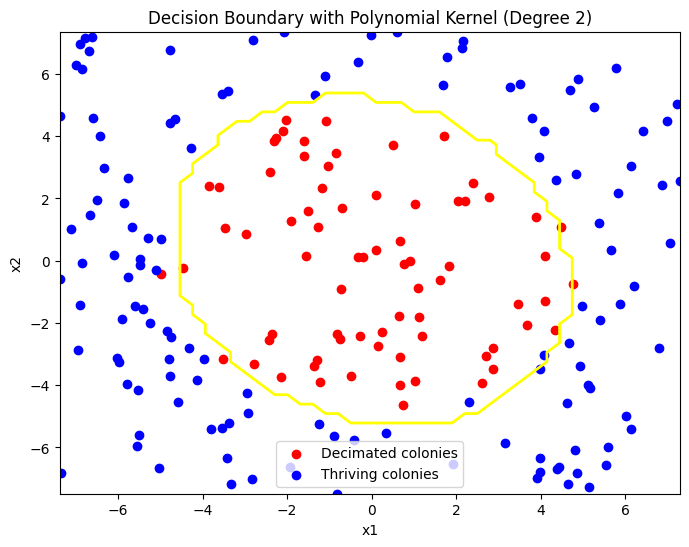

In [ ]:
# Train an SVM classifier with a polynomial kernel (degree 2)
svm_classifier = SVC(kernel='poly', degree=2, C=1)
svm_classifier.fit(X, y)

# Plotting the decision boundary in the original space
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Decimated colonies')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Thriving colonies')

# Create a mesh grid for plotting decision boundary
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
xx, yy = np.meshgrid(x1_range, x2_range)

# Use the trained SVM to predict on the grid points
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='yellow')

# Labels and title for the original space
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with Polynomial Kernel (Degree 2)')

# Show legend
plt.legend()

# Display the plot
plt.show()

The decision boundary obtained using the polynomial kernel method exhibits slight differences compared to the one derived from the explicit feature mapping and linear classification. These differences stem from the nature of kernel methods and their underlying computations.

- **Explicit Feature Map:** When using a hand-crafted feature map (e.g., ($ \Phi(x_1, x_2) = (x_1, x_2, 4(x_1^2 + x_2^2)) $), the transformation is predefined and fixed. The classifier then finds a hyperplane in the explicitly mapped feature space, which corresponds to a non-linear boundary in the original space.
- **Kernel Trick:** In contrast, the polynomial kernel implicitly computes the feature interactions without explicitly mapping the data into the higher-dimensional space. This implicit mapping allows the kernel to adaptively capture the data structure based on the degree of the polynomial and the distribution of the data.

The boundary obtained using the polynomial kernel is influenced by the kernel parameters and the data distribution. The kernel computes similarity directly between points, allowing for a more flexible separation. When using the hand-crafted feature map, the decision boundary is directly tied to the chosen transformation. While effective for specific problems (e.g., circular separability), this approach may lack flexibility if the transformation does not perfectly capture the data's underlying geometry.

In this example, the explicit feature map emphasizes radial separability with a specific quadratic term ($ 4(x_1^2 + x_2^2) $), while the polynomial kernel considers all possible quadratic combinations of the features. This subtle difference in feature representation affects the decision boundary's shape.


Despite the slight differences in the boundary, both approaches successfully classify the two classes. However, the polynomial kernel’s **flexibility** ensures **robustness** across various data distributions, which might not always be achievable with a manually defined feature map.

The differences between the two boundaries highlight the balance between flexibility and **specificity** in feature transformation. While explicit feature maps can provide elegant solutions for specific problems, kernel methods excel in generality and **adaptability**, making them a cornerstone of modern machine learning techniques.


###Polynomial classification

Instead of relying on kernel methods, one might choose to leverage the hypothesis on the form of the decision boundary in the original feature space. As mentioned above, in our classification problem, the data suggests a **quadratic separation** between the two classes:

$$ \mathcal{B}: \alpha_1 x_1^2 + \alpha_2 x_2^2 + \alpha_3 x_1 x_2 + \alpha_4 x_1 + \alpha_5 x_2 + \beta = 0.$$

 (To be more specified we can already set $\beta = 0$ since the dataset is centered ouround the origin). This approach involves making an **explicit assumption** about the mathematical structure of the boundary, such as a second-degree polynomial equation, and then determining the optimal parameters of this equation.

The strategy here mirrors that of logistic regression but applied to an expanded feature space. By generating polynomial features (e.g., quadratic terms), we transform the dataset into a higher-dimensional representation where the decision boundary becomes linear. The parameters of the quadratic decision boundary are then estimated by minimizing the **logistic loss function** over the dataset, as in standard logistic regression.


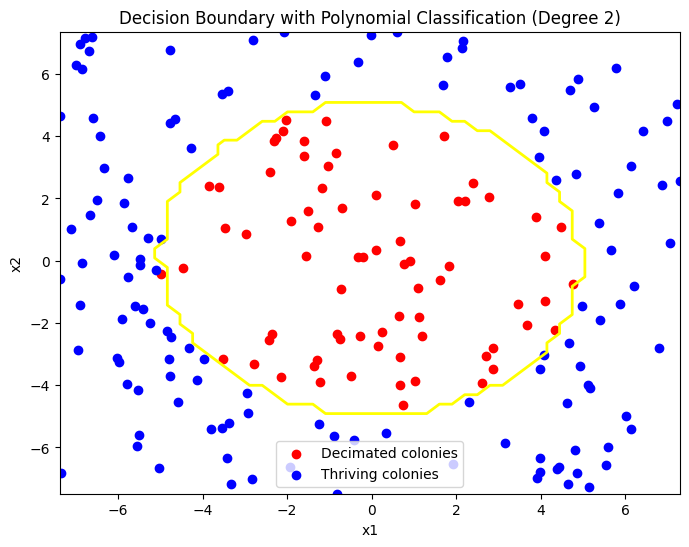

In [ ]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train a logistic regression classifier on the expanded polynomial features
classifier = LogisticRegression()
classifier.fit(X_poly, y)

# Create a mesh grid for plotting decision boundary
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
xx, yy = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predict probabilities for the grid points
Z = classifier.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Decimated colonies')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Thriving colonies')
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='yellow')

# Labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with Polynomial Classification (Degree 2)')

# Show legend
plt.legend()
plt.show()


As we can see, the decision boundary derived using the logistic regression model is very similar to the one obtained with the Support Vector Machine (SVM). Despite the differences in the underlying methods, both approaches successfully capture the separation between the two classes in the feature space. This is especially evident given the high accuracy achieved by the logistic regression model, which indicates that the quadratic form of the decision boundary effectively classifies the data points with a high degree of precision. The similarity between the boundaries reflects how well the quadratic separation hypothesis aligns with the true structure of the data, confirming that this method is capable of capturing the underlying patterns in a way that is comparable to more complex methods like SVMs.

This method has several advantages:  
- **Interpretability**: By explicitly constructing the polynomial features, the resulting boundary can be directly interpreted as a specific quadratic equation.  
- **Simplicity**: This approach avoids the implicit feature mapping of kernel methods, providing a more transparent model.  
- **Customization**: It allows researchers to leverage their intuition about the dataset to design the feature space, such as adding specific polynomial terms relevant to the problem.

However, there are limitations to this approach:  
- **Manual feature design**: It requires some intuition or prior knowledge about the data to determine the appropriate polynomial degree.  
- **Scalability**: Explicitly generating polynomial features can become computationally expensive for high-degree polynomials or large datasets.




### Conclusion on nonlinear classification and the non edibility of plants

Through the process of classification, the biologist team was able to delineate the area separating the decimated and thriving colonies, which led to the hypothesis that a factor in the center of the zone might be contaminating the plants used by the ants.

Further investigation revealed the presence of nuclear waste in the central area, likely releasing toxic isotopes into the soil and water, which in turn affected the plants that the ants relied on for food. This contamination, caused by radioactive material, could have impaired the plants' ability to produce essential nutrients or even led to the accumulation of harmful substances in the ants' food sources.

By leveraging data-driven techniques, the biologists were able to uncover an underlying environmental hazard.


## Conclusion

Through these two toy examples, we have explored the fundamental concept of **binary classification**. A variety of machine learning algorithms and techniques have been discussed, including:

- **Logistic Regression**
- **Linear Regression**
- **Polynomial Classification**
- **Support Vector Classifiers (SVM)**
- **Kernel Methods**
- **Maximimum Likelyhood Estimator**

We also covered essential techniques for improving model performance, such as:

- **Feature Engineering**
- **Convexification of the Loss Function**
- **Gradient Descent**
- **Optimization Methods**

Moreover, we highlighted several key concepts that are central to effective machine learning, such as:

- **Adaptability**
- **Specificity**
- **Robustness**
- **Flexibility**

The core takeaway from this exploration is not just the mastery of techniques but the underlying philosophy of machine learning. At its core, machine learning is about extracting knowledge from data. The ultimate question it addresses is how we can leverage the computational power of modern systems to uncover patterns, insights, and relationships within vast datasets, enabling us to make more informed decisions and solve complex problems that were once out of reach.

